In [1]:
import numpy as np
import pandas as pd

In [2]:
columns=['times_pregnant','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness','serum_insulin','bmi','pedigree_function','age','onset_diabetes']

In [3]:
d = pd.read_csv("pima-indians-diabetes.csv",
               names=columns)
d

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
d.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [5]:
d.dtypes

times_pregnant                    int64
plasma_glucose_concentration      int64
diastolic_blood_pressure          int64
triceps_thickness                 int64
serum_insulin                     int64
bmi                             float64
pedigree_function               float64
age                               int64
onset_diabetes                    int64
dtype: object

##### times_pregnant                    怀孕次数
##### plasma_glucose_concentration      血浆葡萄糖浓度
##### diastolic_blood_pressure          舒张压
##### triceps_thickness                 肱三头肌厚度
##### serum_insulin                     血清胰岛素
##### bmi                               体重指数
##### pedigree_function                 系谱函数
##### age                               年龄
##### onset_diabetes                    发病糖尿病

In [6]:
import matplotlib.pyplot as plt

In [7]:
d["onset_diabetes"].value_counts()

0    500
1    268
Name: onset_diabetes, dtype: int64

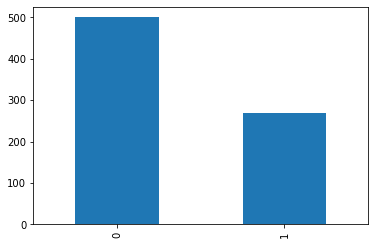

In [8]:
d["onset_diabetes"].value_counts().plot(kind = 'bar')

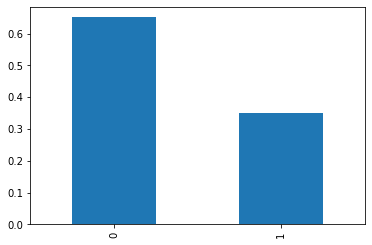

In [9]:
# 比值   normalize=True 正常,标准,归一
d["onset_diabetes"].value_counts(normalize=True).plot(kind = 'bar')

In [10]:
import seaborn as sns

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   times_pregnant                768 non-null    int64  
 1   plasma_glucose_concentration  768 non-null    int64  
 2   diastolic_blood_pressure      768 non-null    int64  
 3   triceps_thickness             768 non-null    int64  
 4   serum_insulin                 768 non-null    int64  
 5   bmi                           768 non-null    float64
 6   pedigree_function             768 non-null    float64
 7   age                           768 non-null    int64  
 8   onset_diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


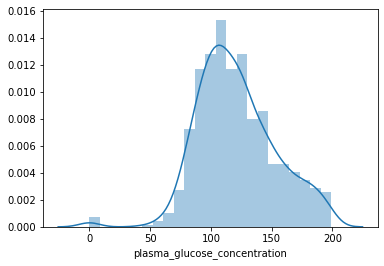

In [12]:
sns.distplot(d["plasma_glucose_concentration"])

In [13]:
d[d["onset_diabetes"] == 0]['plasma_glucose_concentration']

1       85
3       89
5      116
7      115
10     110
      ... 
762     89
763    101
764    122
765    121
767     93
Name: plasma_glucose_concentration, Length: 500, dtype: int64

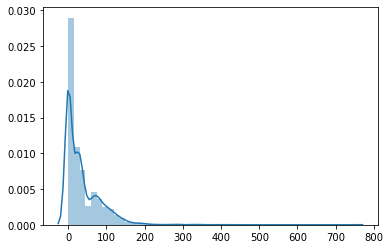

In [14]:
sns.distplot(d[d["onset_diabetes"] == 0])

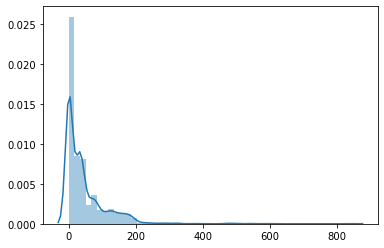

In [15]:
sns.distplot(d[d["onset_diabetes"] == 1])

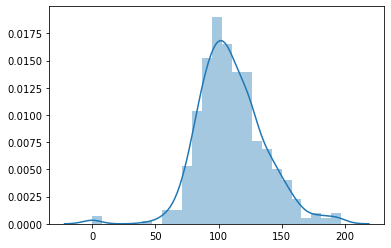

In [16]:
sns.distplot(d[d["onset_diabetes"] == 0][["plasma_glucose_concentration"]])

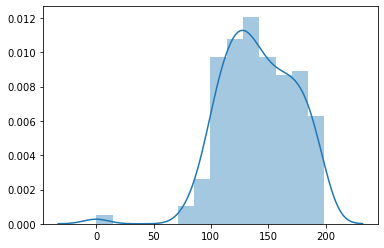

In [17]:
sns.distplot(d[d["onset_diabetes"] == 1][["plasma_glucose_concentration"]])

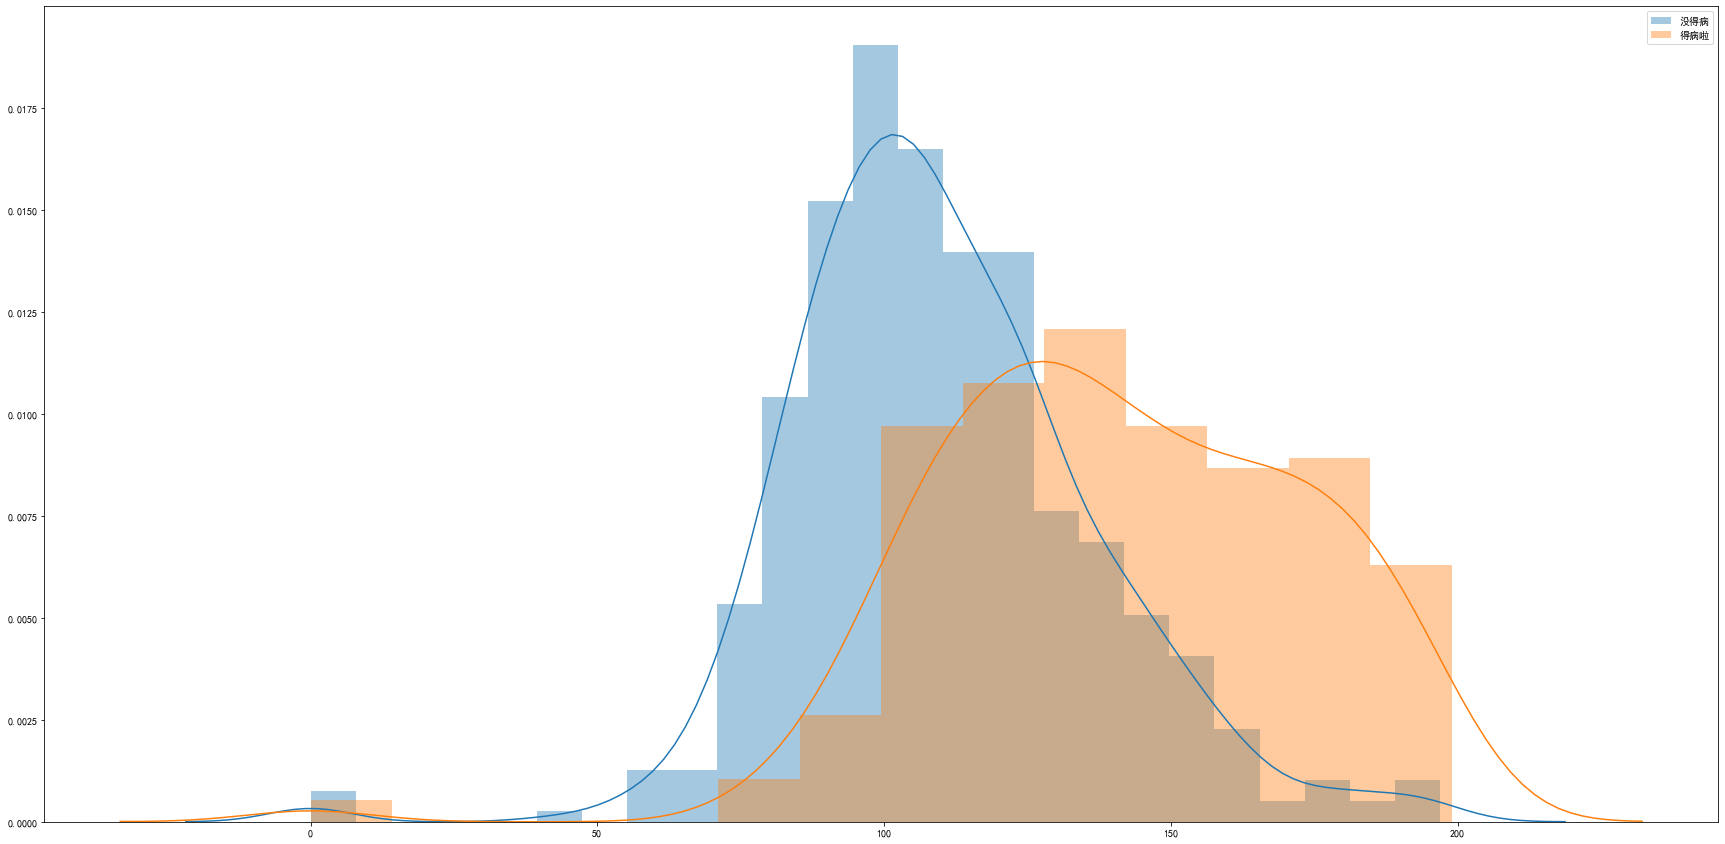

In [18]:
import warnings
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize = (30,15))
sns.distplot(d[d["onset_diabetes"] == 0][["plasma_glucose_concentration"]],label = "没得病")
sns.distplot(d[d["onset_diabetes"] == 1][["plasma_glucose_concentration"]],label = "得病啦")
plt.legend()
plt.show()

* 得病的人血糖浓度均值比较高,得病的人血糖浓度比没得病的人要高

In [19]:
d[d["times_pregnant"]>10]["onset_diabetes"].value_counts()

1    20
0    14
Name: onset_diabetes, dtype: int64

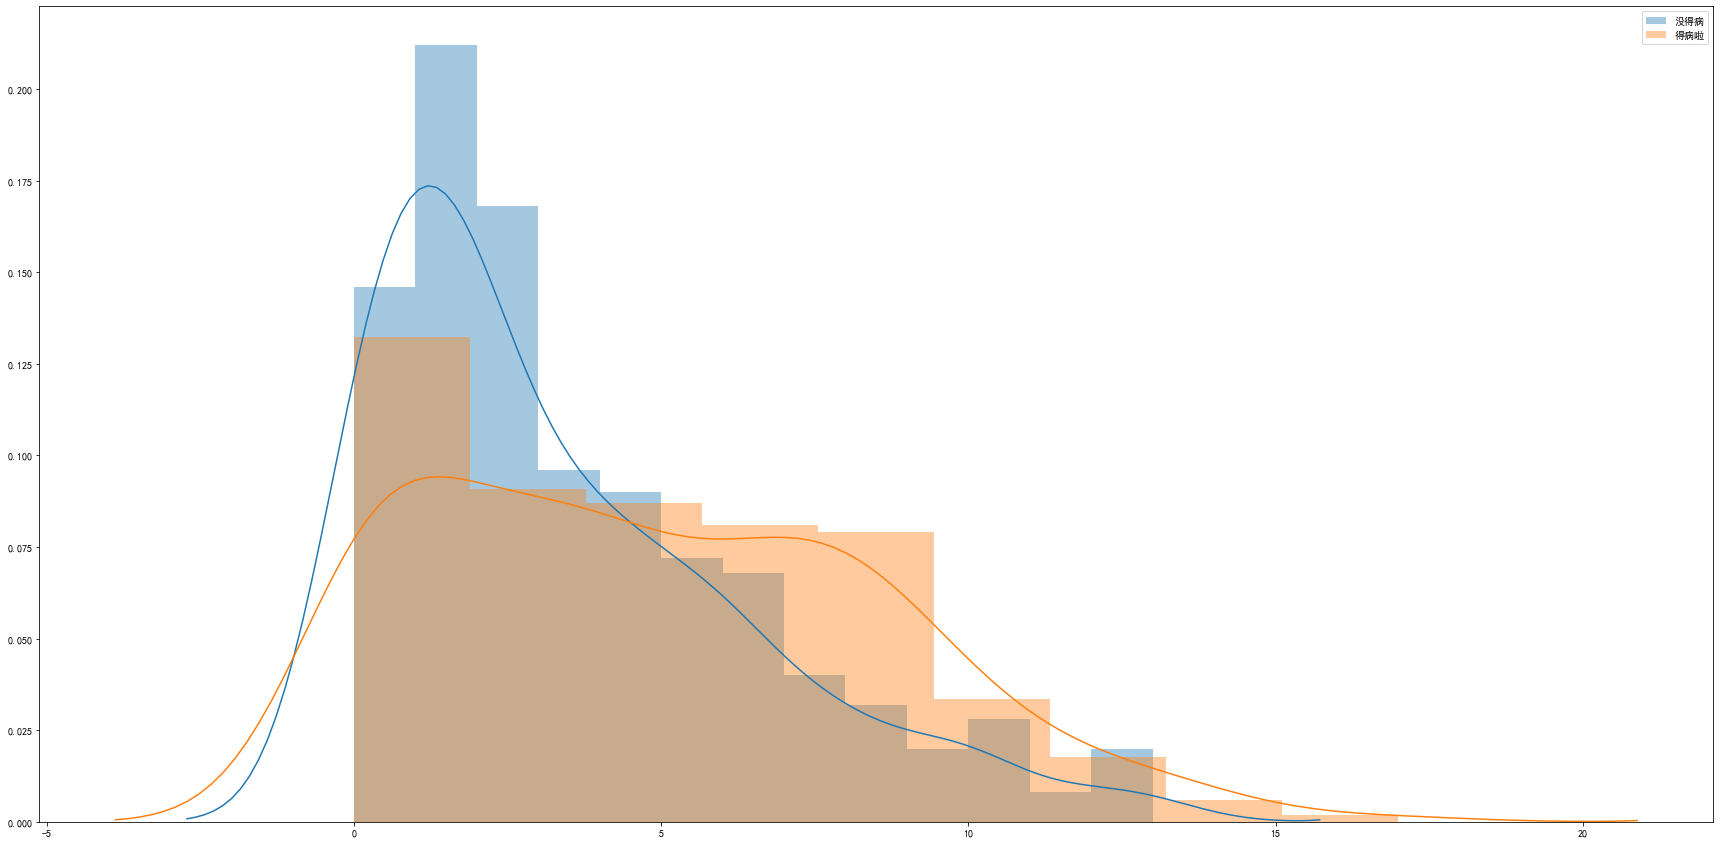

In [20]:
import warnings
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize = (30,15))
sns.distplot(d[d["onset_diabetes"] == 0][["times_pregnant"]],label = "没得病")
sns.distplot(d[d["onset_diabetes"] == 1][["times_pregnant"]],label = "得病啦")
plt.legend()
plt.show()

* 怀孕次数和得不得糖尿病没有太大关系

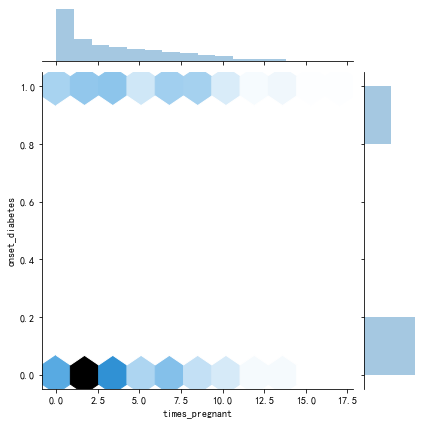

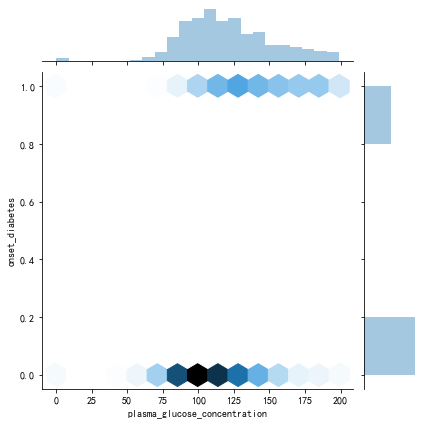

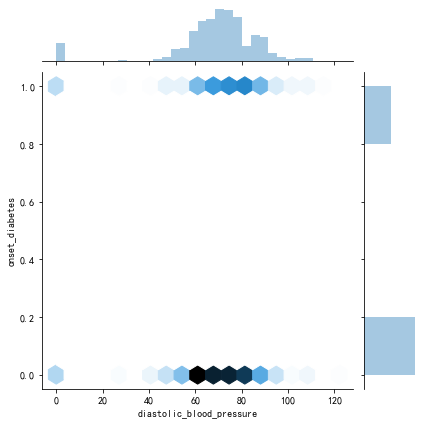

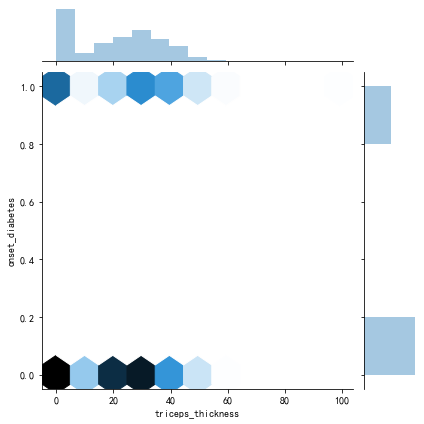

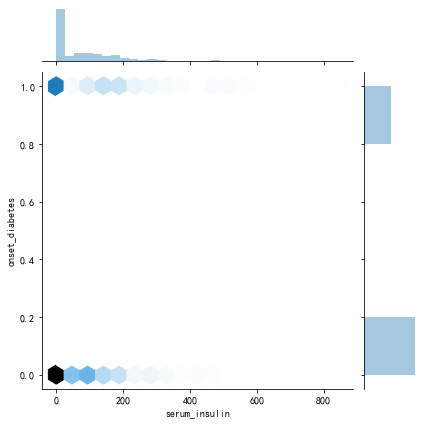

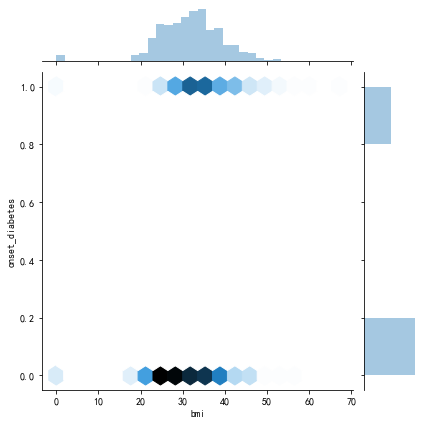

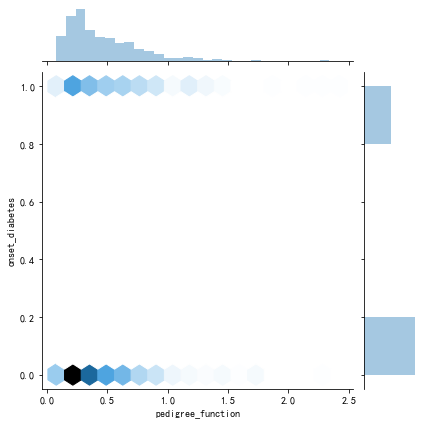

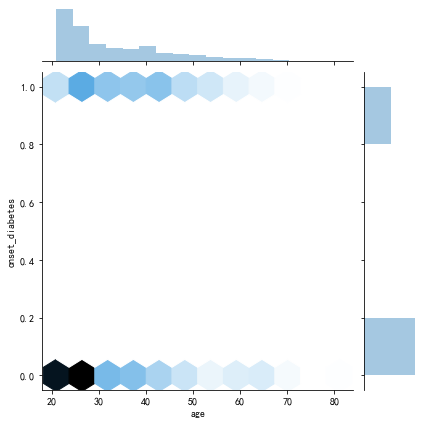

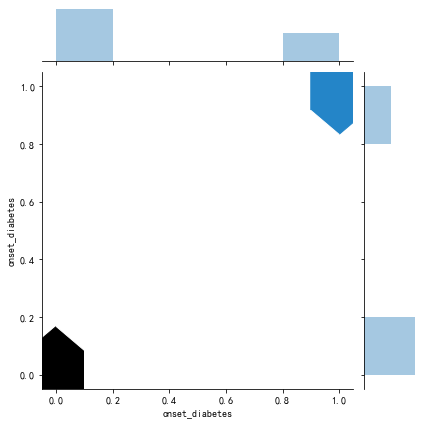

In [21]:
for i in d.columns:
    sns.jointplot(x = i,y = "onset_diabetes",data = d,kind = "hex")

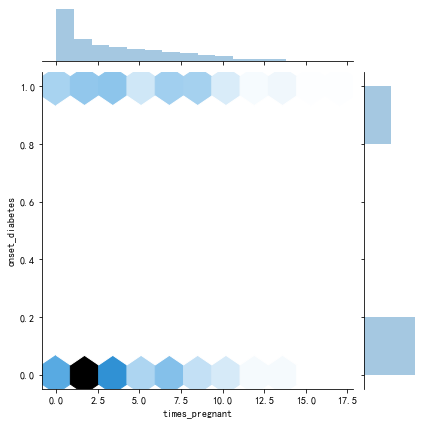

In [22]:
sns.jointplot(x = d['times_pregnant'],y = d['onset_diabetes'],data = d,kind = 'hex')

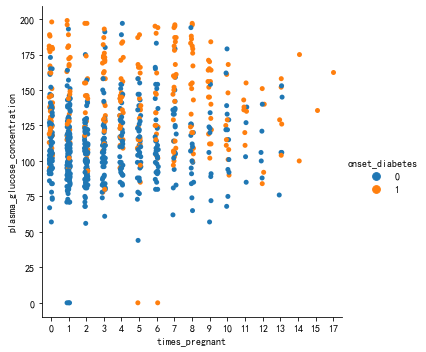

In [23]:
sns.catplot(x = 'times_pregnant',
            y = 'plasma_glucose_concentration',
            hue = 'onset_diabetes',
            data = d
)

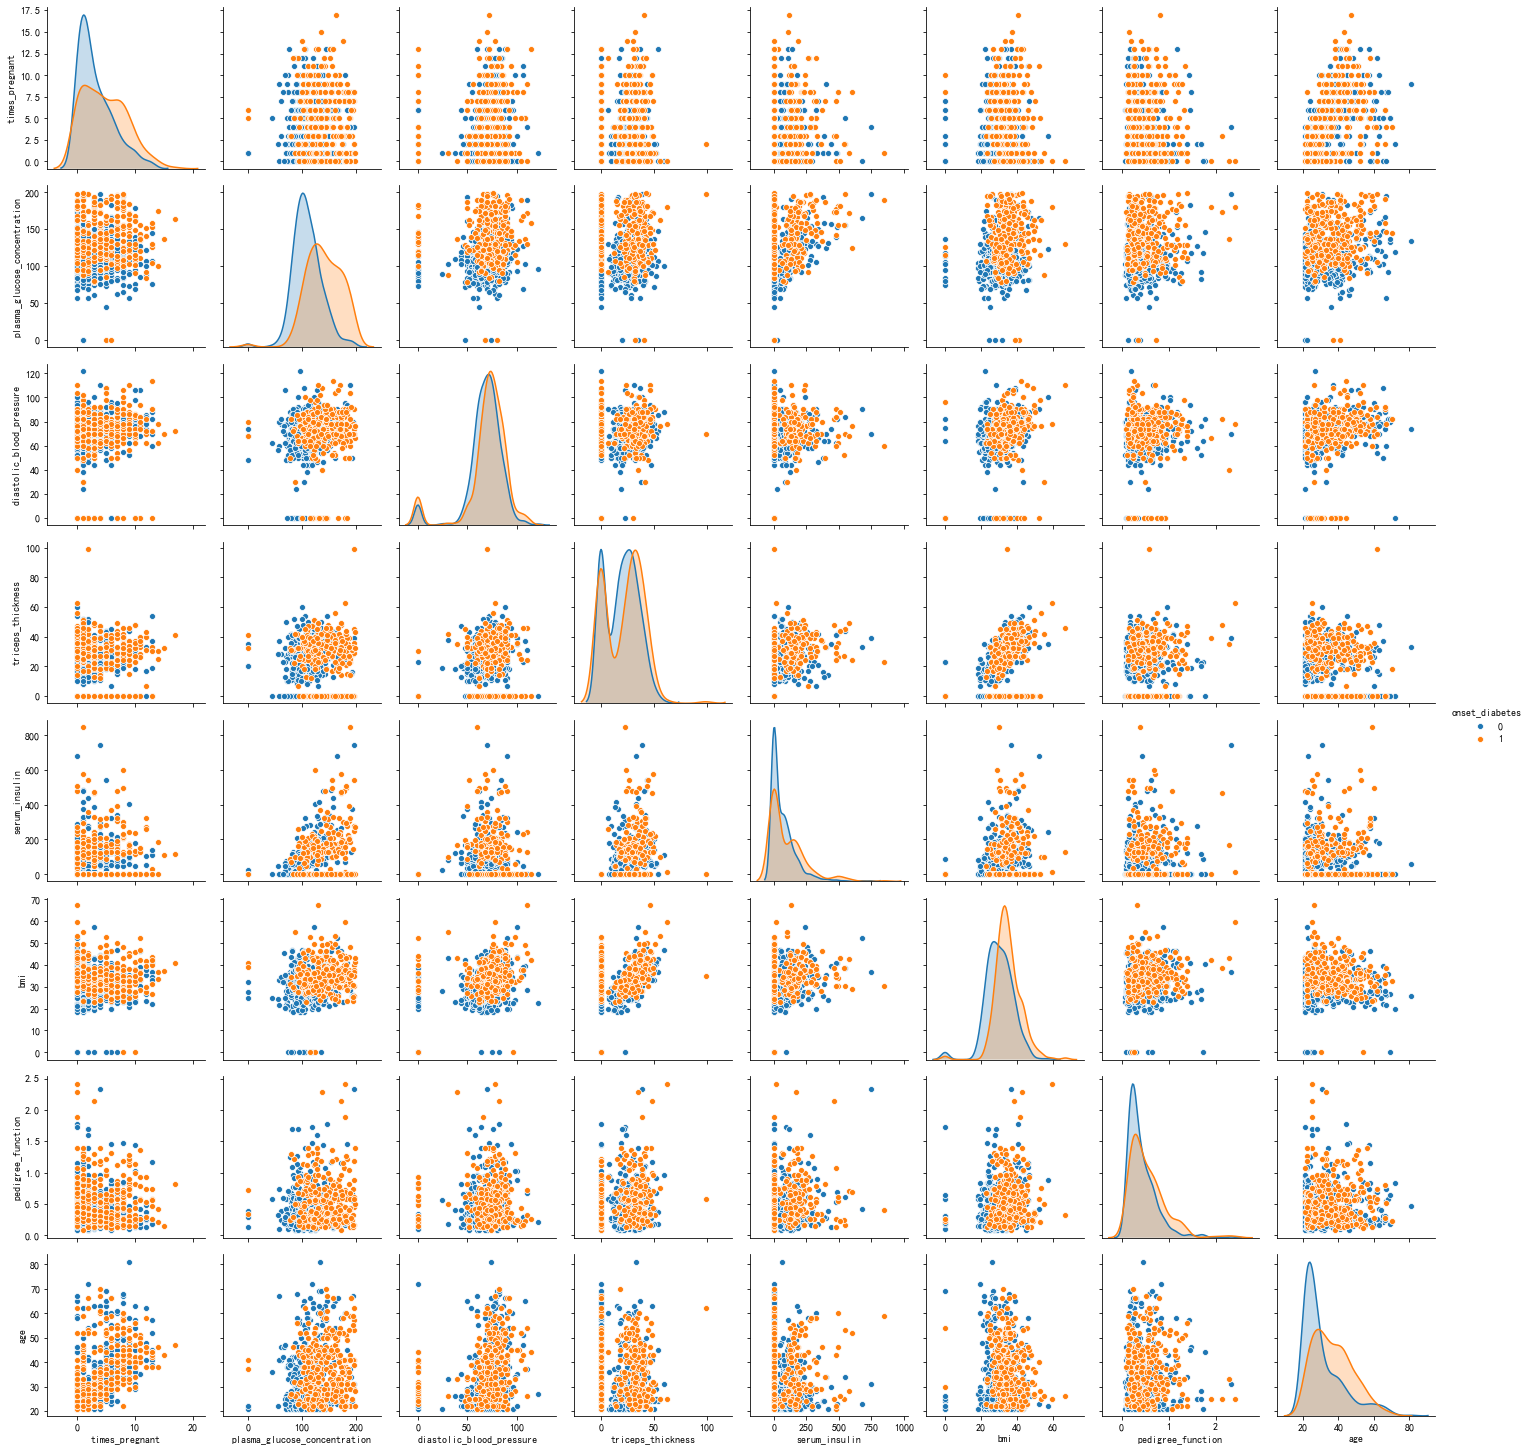

In [24]:
sns.pairplot(d,hue = 'onset_diabetes')

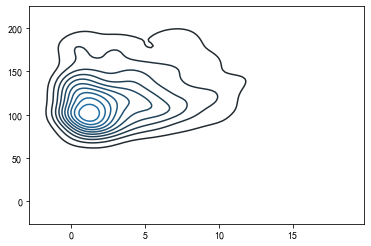

In [25]:
sns.kdeplot(d)

In [26]:
x = d.iloc[:,:-1]
y = d.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

In [28]:
# 没有做归一化处理

# dc = (x-x.min())/(x.max()-x.min())
dc = pd.concat([y,d],axis = 1)
dc

,onset_diabetes,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1
1,0,1,85,66,29,0,26.6,0.351,31,0
2,1,8,183,64,0,0,23.3,0.672,32,1
3,0,1,89,66,23,94,28.1,0.167,21,0
4,1,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,0,10,101,76,48,180,32.9,0.171,63,0
764,0,2,122,70,27,0,36.8,0.340,27,0
765,0,5,121,72,23,112,26.2,0.245,30,0
766,1,1,126,60,0,0,30.1,0.349,47,1


In [29]:
df = pd.melt(frame = d,
             id_vars="onset_diabetes",
             var_name="features", # 名字
             value_name="value") # 值
df

,onset_diabetes,features,value
0,1,times_pregnant,6.0
1,0,times_pregnant,1.0
2,1,times_pregnant,8.0
3,0,times_pregnant,1.0
4,1,times_pregnant,0.0
...,...,...,...
6139,0,age,63.0
6140,0,age,27.0
6141,0,age,30.0
6142,1,age,47.0


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

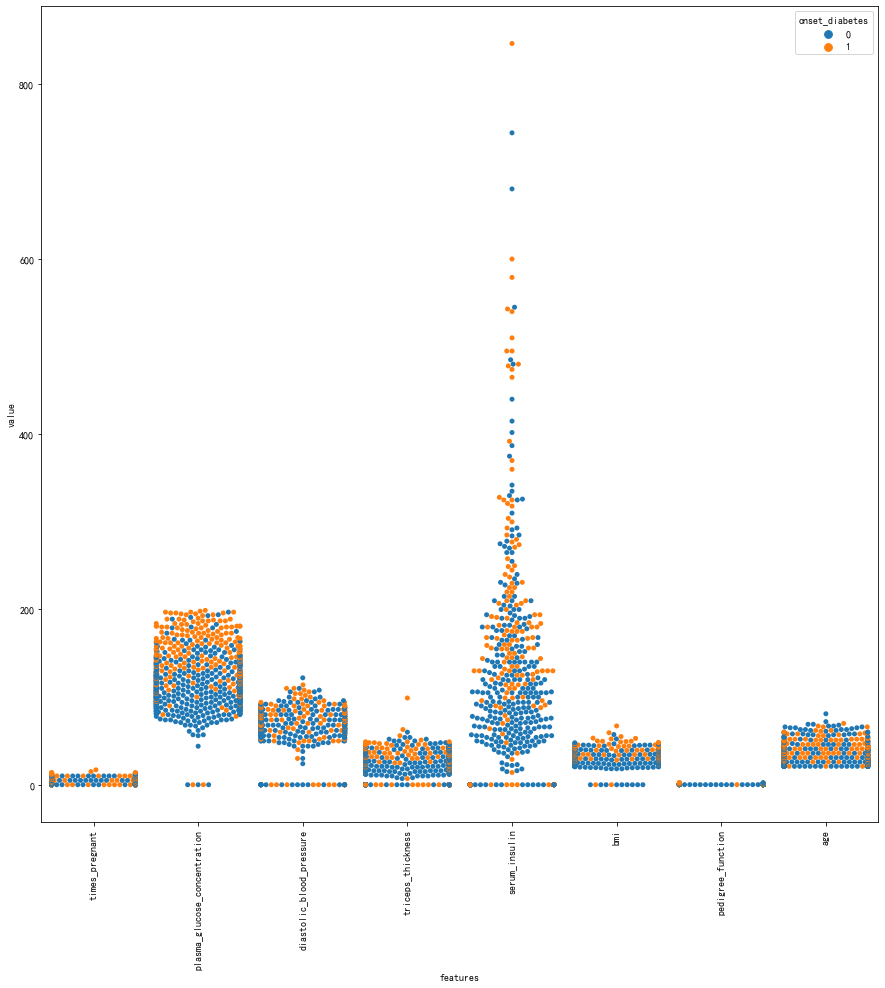

In [30]:
plt.figure(figsize = (15,15))
sns.swarmplot(x = 'features',
              y = 'value',
              hue = 'onset_diabetes',
              data = df)
plt.xticks(rotation = 90) # 旋转

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

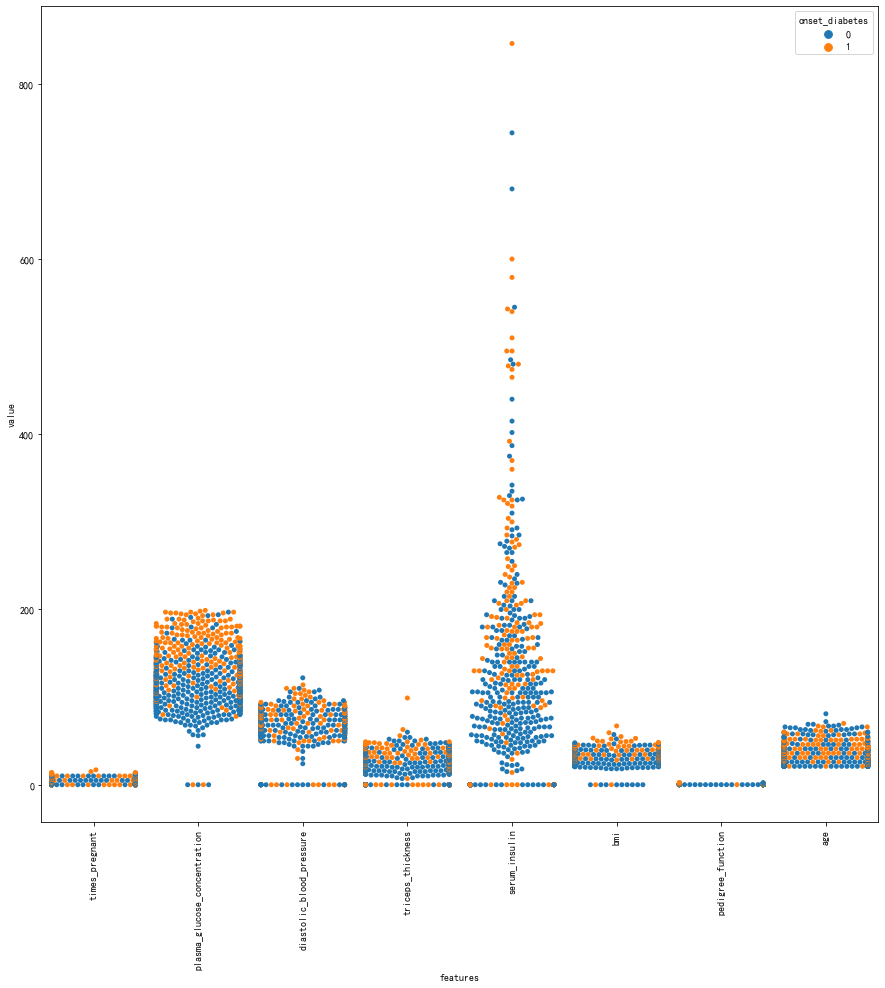

In [31]:
# 做归一化处理

dc = (x-x.min())/(x.max()-x.min())
dc = pd.concat([y,dc],axis = 1)


df = pd.melt(frame = d,
             id_vars="onset_diabetes",
             var_name="features", # 名字
             value_name="value") # 值


plt.figure(figsize = (15,15))
sns.swarmplot(x = 'features',
              y = 'value',
              hue = 'onset_diabetes',
              data = df)
plt.xticks(rotation = 90) # 旋转

In [32]:
d.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
for col in [col for col in d.columns if col not in ["onset_diabetes","pedigree_function","age","times_pregnant"]]:
    d[col].replace([0],[np.nan],inplace = True)

In [14]:
d.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
d.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [16]:
df = d.dropna(axis = 0,how = 'any')

In [17]:
df.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [18]:
col = [x for x in df.columns if x not in ['onset_diabetes']]
x = df.loc[:,col]
y = df.loc[:,"onset_diabetes"]

In [19]:
print(x.shape)
print(y.shape)

(392, 8)
(392,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [24]:
lg = LogisticRegression()
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [25]:
print(x_tr.shape)
print(y_tr.shape)

(313, 8)
(313,)


In [26]:
print(x_te.shape)
print(y_te.shape)

(79, 8)
(79,)


In [27]:
lg.fit(x_tr,y_tr)
y_pre = lg.predict(x_te)
print(y_te.shape)
print(y_pre.shape)

(79,)
(79,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pre

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [29]:
result = classification_report(y_te,y_pre)
print(result)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        52
           1       0.73      0.59      0.65        27

    accuracy                           0.78        79
   macro avg       0.77      0.74      0.75        79
weighted avg       0.78      0.78      0.78        79



In [30]:
d.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [31]:
import copy

In [32]:
df1 = copy.deepcopy(d)
df1.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [33]:
df1["plasma_glucose_concentration"] = df1.groupby(by = ["onset_diabetes"])["plasma_glucose_concentration"].apply(lambda x:x.fillna(x.mean()))
df1.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [34]:
df1["diastolic_blood_pressure"] = df1.groupby(by = ["age"])["diastolic_blood_pressure"].apply(lambda x:x.fillna(x.mean()))
df1.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure          1
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [35]:
df1["triceps_thickness"] = df1.groupby(by = ["age"])["triceps_thickness"].apply(lambda x:x.fillna(x.mean()))
df1.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure          1
triceps_thickness                12
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [36]:
df1["serum_insulin"] = df1.groupby(by = ["onset_diabetes","plasma_glucose_concentration"])["serum_insulin"].apply(lambda x:x.fillna(x.mean()))
df1.isnull().sum()

times_pregnant                   0
plasma_glucose_concentration     0
diastolic_blood_pressure         1
triceps_thickness               12
serum_insulin                   75
bmi                             11
pedigree_function                0
age                              0
onset_diabetes                   0
dtype: int64

In [37]:
df1["bmi"] = df1.groupby(by = ["age"])["bmi"].apply(lambda x:x.fillna(x.mean()))
df1.isnull().sum()

times_pregnant                   0
plasma_glucose_concentration     0
diastolic_blood_pressure         1
triceps_thickness               12
serum_insulin                   75
bmi                              0
pedigree_function                0
age                              0
onset_diabetes                   0
dtype: int64

In [38]:
df11 = df1.dropna(axis = 0,how = "any")
df11.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [39]:
col = [x for x in df11.columns if x not in ['onset_diabetes']]
x = df11.loc[:,col]
y = df11.loc[:,"onset_diabetes"]

lg = LogisticRegression()
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 42)

lg.fit(x_tr,y_tr)
y_pre = lg.predict(x_te)
result = classification_report(y_te,y_pre)
print(result)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        93
           1       0.87      0.60      0.71        45

    accuracy                           0.84       138
   macro avg       0.85      0.78      0.80       138
weighted avg       0.84      0.84      0.83       138



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
df1.isnull().sum()

times_pregnant                   0
plasma_glucose_concentration     0
diastolic_blood_pressure         1
triceps_thickness               12
serum_insulin                   75
bmi                              0
pedigree_function                0
age                              0
onset_diabetes                   0
dtype: int64

In [41]:
df2 = copy.deepcopy(df1)
df2.isnull().sum()

times_pregnant                   0
plasma_glucose_concentration     0
diastolic_blood_pressure         1
triceps_thickness               12
serum_insulin                   75
bmi                              0
pedigree_function                0
age                              0
onset_diabetes                   0
dtype: int64

In [42]:
df2["serum_insulin"] = df2.groupby(by = ["age"])["serum_insulin"].apply(lambda x:x.fillna(x.mean()))
df2.isnull().sum()

times_pregnant                   0
plasma_glucose_concentration     0
diastolic_blood_pressure         1
triceps_thickness               12
serum_insulin                    0
bmi                              0
pedigree_function                0
age                              0
onset_diabetes                   0
dtype: int64

In [43]:
df2["triceps_thickness"] = df2.groupby(by = ["onset_diabetes"])["triceps_thickness"].apply(lambda x:x.fillna(x.mean()))
df2.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        1
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [44]:
df22 = df2.dropna(axis = 0,how = "any")
df22.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [45]:
col = [x for x in df22.columns if x not in ['onset_diabetes']]
x = df22.loc[:,col]
y = df22.loc[:,"onset_diabetes"]

lg = LogisticRegression()
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 42)

lg.fit(x_tr,y_tr)
y_pre = lg.predict(x_te)
result = classification_report(y_te,y_pre)
print(result)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        98
           1       0.75      0.71      0.73        56

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
df9 = copy.deepcopy(df1)
df9.isnull().sum()

times_pregnant                   0
plasma_glucose_concentration     0
diastolic_blood_pressure         1
triceps_thickness               12
serum_insulin                   75
bmi                              0
pedigree_function                0
age                              0
onset_diabetes                   0
dtype: int64

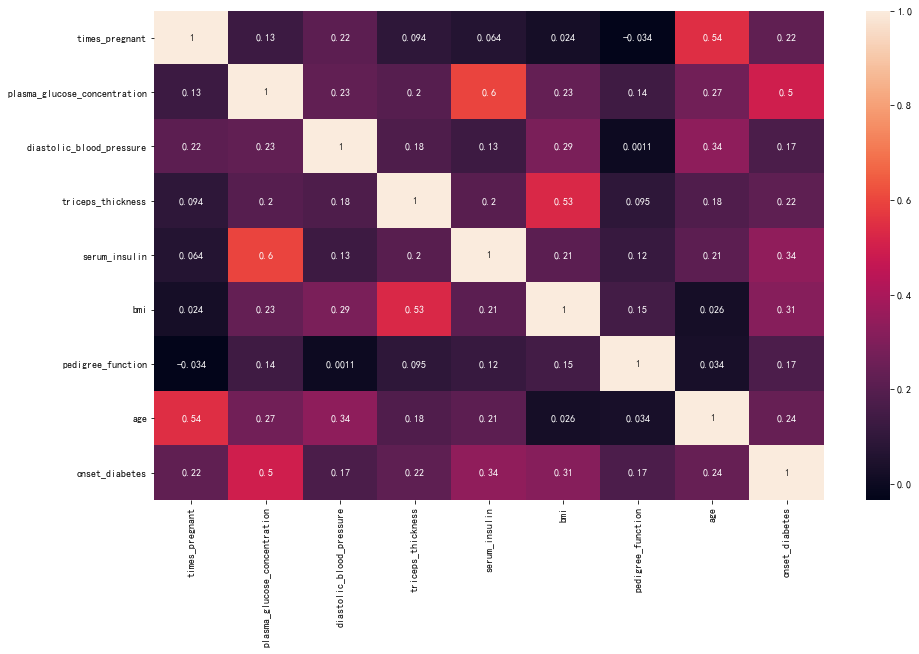

In [64]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df9.corr(),annot=True)

In [47]:
df99 = df9.dropna(axis = 0,how = 'any')
df99.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [88]:
col = [x for x in df22.columns if x not in ['onset_diabetes']]
x = df22.loc[:,col]
y = df22.loc[:,"onset_diabetes"]

lg = LogisticRegression()
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 42)

lg.fit(x_tr,y_tr)
y_pre = lg.predict(x_te)
result = classification_report(y_te,y_pre)
print(result)i

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        98
           1       0.75      0.71      0.73        56

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from pyfm import pylibfm